# artigo Grafo
---
Aluno: [João Pedro Serezuelo Amancio](https://github.com/JoaoSerezuelo)


### importa bibliotecas e faz o grafo

c:\Users\jpedr\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


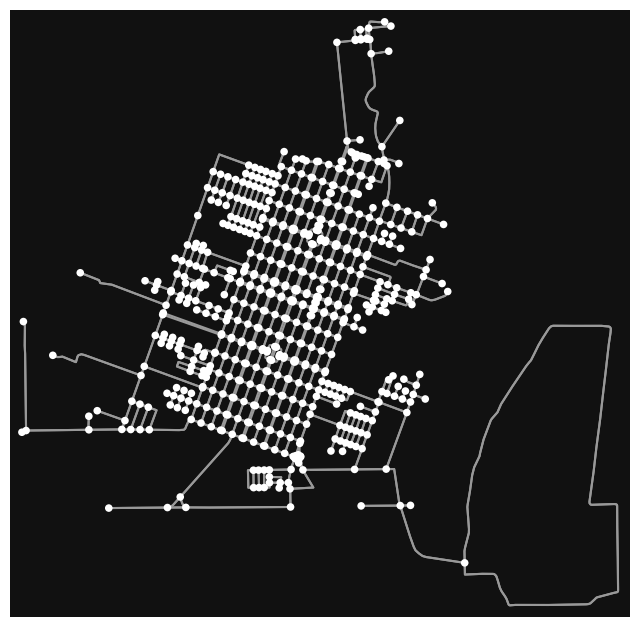

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations


# Definir o nome do lugar e as coordenadas para o centro de Santa Helena, Paraná, Brasil
place_name = "Santa Helena, Paraná, Brazil"
radius = 3000  # raio de 3 km para a área central

# Obter as coordenadas do centro da cidade
center_point = ox.geocode(place_name)

# Obter o grafo de ruas ao redor do ponto central em um raio de 3 km
G = ox.graph_from_point(center_point, dist=radius, network_type='drive')

# Plotar a área central com o grafo sobreposto
fig, ax = ox.plot_graph(G, node_size=30, edge_linewidth=1.5)

### pega um id para os vértices e o encontro de ruas desse vértice e assim faz um txt com essas informações

In [2]:
# Obter a lista de nós com suas coordenadas
nodes, edges = ox.graph_to_gdfs(G)

# Salvar os IDs dos nós e informações em um arquivo de texto
output_path = "node_ids_with_info.txt"
with open(output_path, "w") as file:
    for node_id, data in nodes.iterrows():
        # Obter os nomes das ruas adjacentes ao nó
        street_names = set()
        for u, v, key, geom in G.edges(data='geometry', keys=True):
            if u == node_id or v == node_id:
                street_name = G.edges[u, v, key].get('name', 'unknown street')
                if isinstance(street_name, list):
                    street_names.update(street_name)
                else:
                    street_names.add(street_name)
        
        # Formatar os nomes das ruas
        street_names = ", ".join(street_names) if street_names else "unknown intersection"
        
        # Escrever a linha no arquivo de texto
        file.write(f"ID: {node_id}, Encontro das ruas: {street_names}\n")

print(f"Arquivo com informações dos nós salvo em: {output_path}")


Arquivo com informações dos nós salvo em: node_ids_with_info.txt


### caminho mínimo com os ids de origem e destino

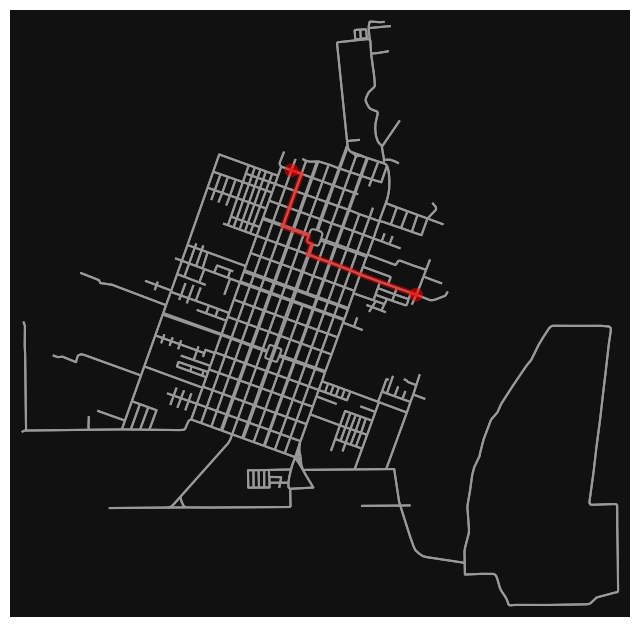

Distância total do caminho mínimo: 2168.16 metros


In [3]:
# Definir o nó de origem e destino com base na lista de nós
orig_node = 2634217558 # Substitua com o ID do nó de origem
dest_node = 6842718288  # Substitua com o ID do nó de destino

# Calcular o caminho mais curto
shortest_path = nx.shortest_path(G, orig_node, dest_node, weight='length')

# Calcular o comprimento do caminho
path_length = nx.shortest_path_length(G, orig_node, dest_node, weight='length')

# Plotar o grafo com o caminho mínimo destacado em vermelho
fig, ax = ox.plot_graph_route(G, route=shortest_path, route_linewidth=4, node_size=0, edge_linewidth=1.5, route_color='r')

# Exibir a distância total do caminho
print(f"Distância total do caminho mínimo: {path_length:.2f} metros")
